In [59]:
import pandas as pd
import pickle as pkl
import shap
from sklearn.metrics import mean_squared_error

In [60]:
rf_results = pd.read_csv('../_data/full_data_with_predictions_rf.csv')
gbm_results = pd.read_csv('../_data/full_data_with_predictions_gbm.csv')
xgb_results = pd.read_csv('../_data/full_data_with_predictions_xgboost.csv')

In [61]:
print(f'RMSE for Random Forest: {mean_squared_error(rf_results.percent_vaccinated_log, rf_results.prediction, squared=True)}')
print(f'RMSE for GBM: {mean_squared_error(gbm_results.percent_vaccinated_log, gbm_results.prediction, squared=True)}')
print(f'RMSE for XGBoost: {mean_squared_error(xgb_results.percent_vaccinated_log, xgb_results.prediction, squared=True)}')

RMSE for Random Forest: 0.020319031287268204
RMSE for GBM: 0.019785638295877563
RMSE for XGBoost: 0.02269971004929003


In [66]:
# Analyze results only for the best model
with open('../_data/model_gbm.pkl', 'rb') as f:
    gbm_model = pkl.load(f)

Trying to unpickle estimator DecisionTreeRegressor from version 1.4.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator DummyRegressor from version 1.4.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator GradientBoostingRegressor from version 1.4.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [64]:
# Add information about the type of municipality to the data frame (1 = urban, 2 = rural, 3 = mixed urban-rural)
def muncipality_type_conditional(x):
    if x == '1':
        return 'urban'
    elif x == '2':
        return 'rural'
    else:
        return 'mixed_urban_rural'

gbm_results['municipality_type'] = gbm_results['municipality_code'].map(lambda x: muncipality_type_conditional(str(x)[-1]))

KeyError: 'municipality_code'

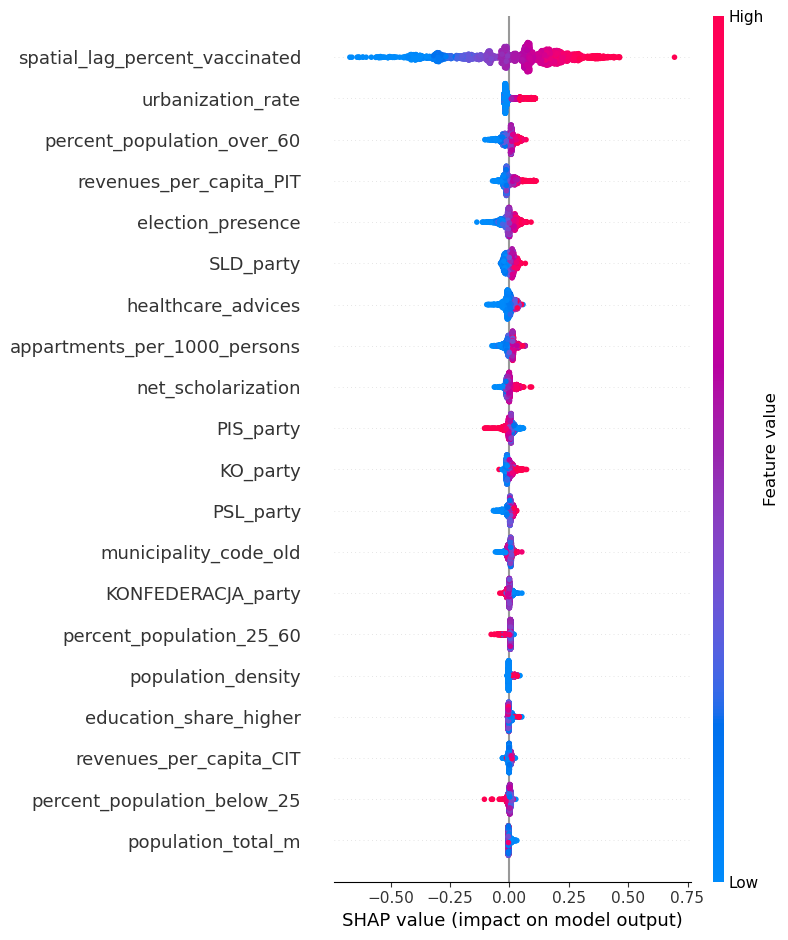

In [83]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(gbm_model)

filtered_df = gbm_results.drop(columns=['percent_vaccinated_log', 'prediction'])
shap_values = explainer.shap_values(filtered_df)

shap.summary_plot(shap_values, filtered_df)

In [86]:
background_data = shap.utils.sample(filtered_df, 100)
explainer = shap.Explainer(gbm_model.predict, background_data)
shap_values = explainer(filtered_df)
shap.plots.waterfall(shap_values[0])

AttributeError: 'HalfSquaredError' object has no attribute 'get_init_raw_predictions'

In [77]:
exp = explainer(gbm_results.drop(columns=['percent_vaccinated_log']))
shap.plots.waterfall(explainer, max_display=14)

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was -0.239764, while the model output was -0.224547. If this difference is acceptable you can set check_additivity=False to disable this check.

In [46]:
fig, ax = shap.partial_dependence_plot(
    "",
    gbm_model.predict,
    gbm_results.drop(columns=['prediction', 
                              'county_name', 
                              'county_code', 
                              'voivodeship',  
                              'municipality_name',
                              'municipality_code_str',
                              'percent_vaccinated_log']),
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
)

ValueError: Could not find feature named: percent_vaccinated_log